# M8 Project: Kaggle Competition

# Introduction
For this Kaggle Competition Project I want to consider the following datasets which is available at: 
* https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/dat.

To predict traffic congestion in 4 major US cities, I will continue may analysis with some steps:

- Load and clean the data
- Normalize the data
- Perform principle component analysis (PCA)
- Explain how many components will you choose based on an explained variance ratio of your choice
- Plot the proportion of explained variance and the number of components
- Using the selected number of components from 2, find which features of the original data have the highest absolute correlation with each of the components.
- Select features with absolute correlation with the PCA components of at least 0,75.
- Answer how many and which features will you end up with?

# Step 1: Clean Data

**1.1 Load Data**

In [26]:
# Import pandas to read the data
import pandas as pd

In [27]:
# load train dataset 
train = pd.read_csv('train.csv')
train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [28]:
# Print the columns of the dataset
train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City'],
      dtype='object')

In [29]:
# Print dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

In [30]:
# Drop 'RowId' column only if it exists
if 'RowId' in train.columns:
    train.drop(columns=['RowId'], inplace=True)

# Print dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   IntersectionId           856387 non-null  int64  
 1   Latitude                 856387 non-null  float64
 2   Longitude                856387 non-null  float64
 3   EntryStreetName          848239 non-null  object 
 4   ExitStreetName           850100 non-null  object 
 5   EntryHeading             856387 non-null  object 
 6   ExitHeading              856387 non-null  object 
 7   Hour                     856387 non-null  int64  
 8   Weekend                  856387 non-null  int64  
 9   Month                    856387 non-null  int64  
 10  Path                     856387 non-null  object 
 11  TotalTimeStopped_p20     856387 non-null  float64
 12  TotalTimeStopped_p40     856387 non-null  float64
 13  TotalTimeStopped_p50     856387 non-null  float64
 14  Tota

**1.2 Explanation of Data columns:**

* IntersectionId: Represents a unique intersectionID for some intersection of roads within a city.
* Latitude: The latitude of the intersection.
* Longitude: The longitude of the intersection.
* EntryStreetName: The street name where vehicles got in towards the intersection.
* ExitStreetName: The street name where vehicle got out from the intersection.
* EntryHeading: Direction to which the car was heading while entering the intersection.
* ExitHeading: Direction to which the car was heading while going out from the intersection.
* Hour: The hour of the day.
* Weekend: It's weekend or not.
* Month: Which Month it is.
* Path: It is a concatination in the format: EntryStreetName_EntryHeading ExitStreetName_ExitHeading.
* TotalTimeStopped_p20: Total time for which 20% of the vehicles had to stop at an intersection.
* TotalTimeStopped_p40: Total time for which 40% of the vehicles had to stop at an intersection.
* TotalTimeStopped_p50: Total time for which 50% of the vehicles had to stop at an intersection.
* TotalTimeStopped_p60: Total time for which 60% of the vehicles had to stop at an intersection.
* TotalTimeStopped_p80: Total time for which 80% of the vehicles had to stop at an intersection.
* TimeFromFirstStop_p20: Time taken for 20% of the vehicles to stop again after crossing a intersection.
* TimeFromFirstStop_p40: Time taken for 40% of the vehicles to stop again after crossing a intersection.
* TimeFromFirstStop_p50: Time taken for 50% of the vehicles to stop again after crossing a intersection.
* TimeFromFirstStop_p60: Time taken for 60% of the vehicles to stop again after crossing a intersection.
* TimeFromFirstStop_p80: Time taken for 80% of the vehicles to stop again after crossing a intersection.
* DistanceToFirstStop_p20: How far before the intersection the 20% of the vehicles stopped for the first time.
* DistanceToFirstStop_p40: How far before the intersection the 40% of the vehicles stopped for the first time.
* DistanceToFirstStop_p50: How far before the intersection the 50% of the vehicles stopped for the first time.
* DistanceToFirstStop_p60: How far before the intersection the 60% of the vehicles stopped for the first time.
* DistanceToFirstStop_p80: How far before the intersection the 80% of the vehicles stopped for the first time.
* City: Name of the city

**1.3 Handle Missing Values:**

In [34]:
# Check for missing values.

train.isnull().sum()

IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

COMMENTS: We noticed that 'EntryStreetName' and 'ExitStreetName' columns have missing values

In [36]:
# Percentage of missing values
missing_values = train.isnull().sum() / len(train) * 100
print(missing_values[missing_values > 0])  # Only show columns with missing values

EntryStreetName    0.951439
ExitStreetName     0.734131
dtype: float64


In [37]:
# Ratio of missing values
train[['EntryStreetName','ExitStreetName']].isna().sum() / train.shape[0]

EntryStreetName    0.009514
ExitStreetName     0.007341
dtype: float64

The ratio of missing values are negligible, therefore we will drop the rows.

In [39]:
# Dropping rows as the missing percentage is small
train_cleaned = train.dropna(subset=['EntryStreetName', 'ExitStreetName'])

**1.4 Check for Duplicates**

We will remove any duplicate rows if they exist.

In [42]:
# Remove duplicates
train_cleaned = train_cleaned.drop_duplicates()

# Check if duplicates were removed
print(f"Duplicates removed: {len(train) - len(train_cleaned)}")

Duplicates removed: 13935


# Step 2: Exploratory Data Analysis (EDA)

**2.1 Understanding Data**

*Let's visualize the distribution of key numerical features.*

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

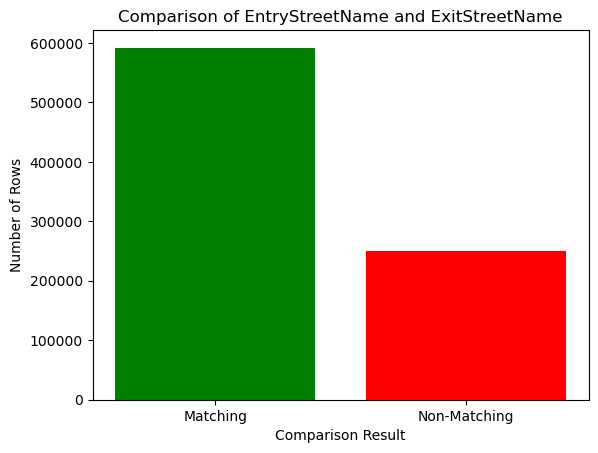

In [47]:
# Check for rows where EntryStreetName and ExitStreetName match
train_cleaned['StreetMatch'] = train_cleaned['EntryStreetName'] == train_cleaned['ExitStreetName']

# Count the matching and non-matching rows
match_count = train_cleaned['StreetMatch'].sum()
non_match_count = len(train_cleaned) - match_count

# Create a bar chart
labels = ['Matching', 'Non-Matching']
counts = [match_count, non_match_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Comparison Result')
plt.ylabel('Number of Rows')
plt.title('Comparison of EntryStreetName and ExitStreetName')
plt.show()

COMMENTS: almost two third of vehicales use same Entry and Exit points.

In [49]:
# Check the city names
train_cleaned['City'].unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

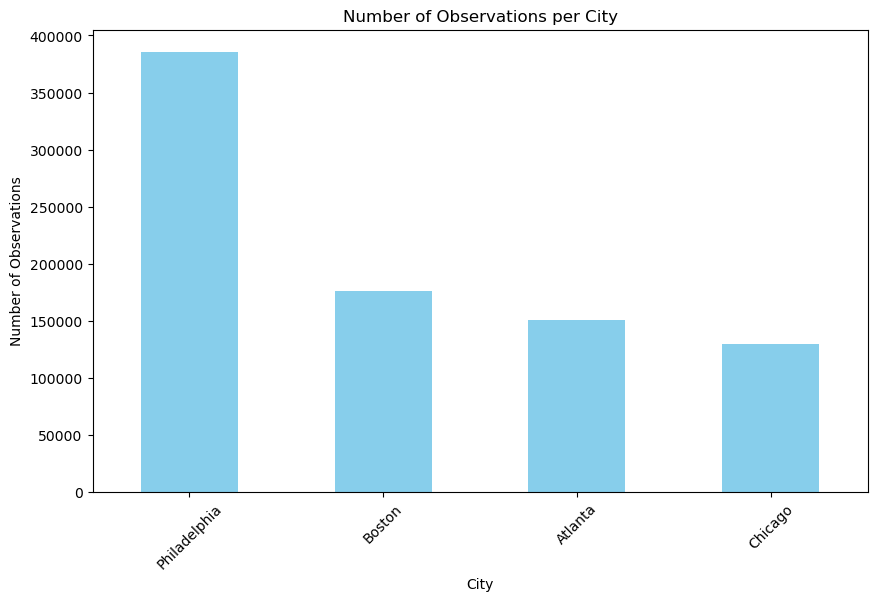

In [50]:
# Count the occurrences of each city
city_counts = train_cleaned['City'].value_counts()

# Plot the counts as a bar chart
city_counts.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.xlabel('City')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per City')
plt.xticks(rotation=45)
plt.show()

**2.2 Numerical columns Analysis**

In [52]:
# Select the columns you want to plot (numerical columns)
numerical_columns = [
    'TotalTimeStopped_p20', 'TotalTimeStopped_p40', 'TotalTimeStopped_p50', 
    'TotalTimeStopped_p60', 'TotalTimeStopped_p80', 'DistanceToFirstStop_p20', 
    'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p60', 
    'DistanceToFirstStop_p80'
]

Checking of Outliers

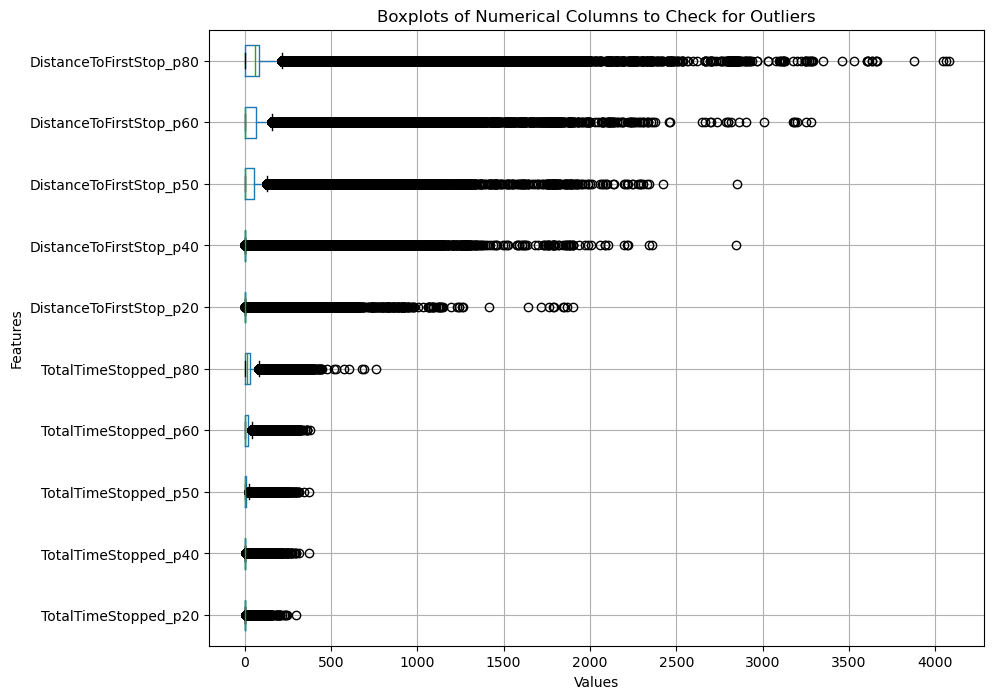

In [54]:
# Create a horizontal boxplot
plt.figure(figsize=(10, 8))
train_cleaned[numerical_columns].boxplot(vert=False)
plt.title('Boxplots of Numerical Columns to Check for Outliers')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [55]:
# Calculate IQR for each numerical column
iqr = train_cleaned[numerical_columns].quantile(0.75) - train_cleaned[numerical_columns].quantile(0.25)
u_limit = train_cleaned[numerical_columns].quantile(0.75) + 1.5 * iqr  # Upper limit
l_limit = train_cleaned[numerical_columns].quantile(0.25) - 1.5 * iqr  # Lower limit
print(iqr)

# Initialize a boolean DataFrame to mark rows that have outliers in any column
outliers_condition = (train_cleaned[numerical_columns] < l_limit) | (train_cleaned[numerical_columns] > u_limit)

# Get the outlier counts for each column
outliers_summary = outliers_condition.sum()

# Print the outlier counts for each column
print("Outliers per column:")
print(outliers_summary)

TotalTimeStopped_p20        0.0
TotalTimeStopped_p40        0.0
TotalTimeStopped_p50       10.0
TotalTimeStopped_p60       18.0
TotalTimeStopped_p80       34.0
DistanceToFirstStop_p20     0.0
DistanceToFirstStop_p40     0.0
DistanceToFirstStop_p50    52.9
DistanceToFirstStop_p60    64.1
DistanceToFirstStop_p80    85.8
dtype: float64
Outliers per column:
TotalTimeStopped_p20        76359
TotalTimeStopped_p40       199534
TotalTimeStopped_p50        91131
TotalTimeStopped_p60        54023
TotalTimeStopped_p80        25488
DistanceToFirstStop_p20     76352
DistanceToFirstStop_p40    199525
DistanceToFirstStop_p50     25688
DistanceToFirstStop_p60     36232
DistanceToFirstStop_p80     61641
dtype: int64


**Comments:**

We can not take the decision of outliers because the IQR value 0 columns have also median 0.

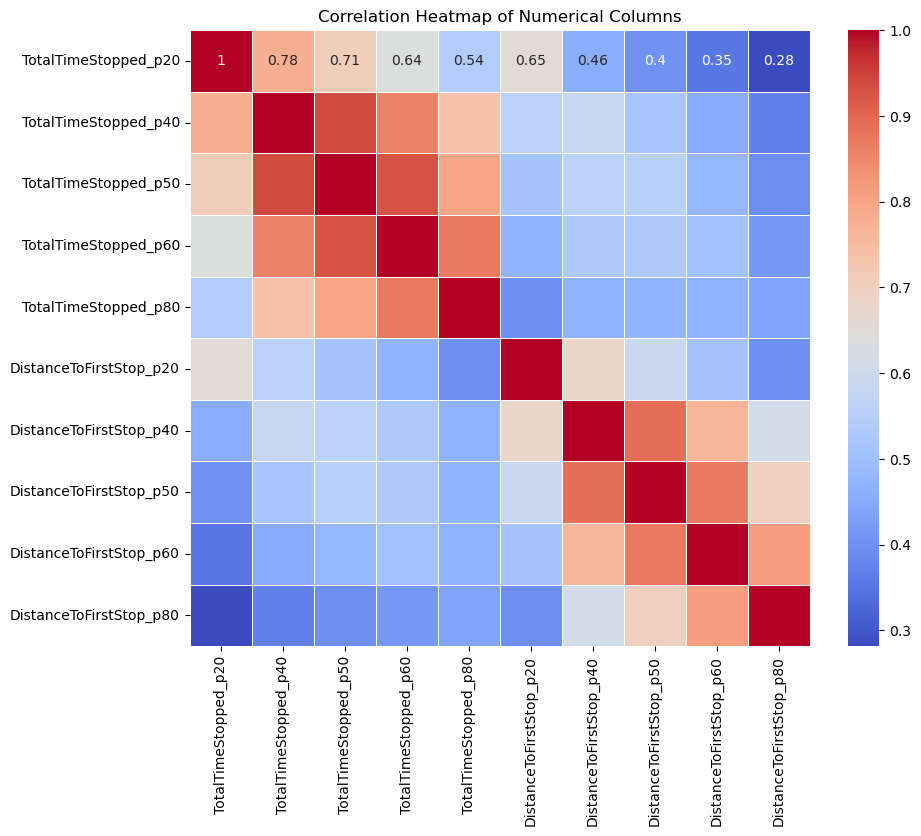

In [58]:
# Compute correlation matrix for numerical columns
corr_matrix = train_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [59]:
# Find the pair with the highest absolute correlation (excluding self-correlations)
corr_matrix_unstacked = corr_matrix.abs().unstack()  # Unstack the matrix to get pairs
corr_matrix_unstacked = corr_matrix_unstacked[corr_matrix_unstacked < 1]  # Remove diagonal (self-correlation)

# Find the maximum correlation value and the corresponding column pair
max_corr = corr_matrix_unstacked.idxmax()
max_corr_value = corr_matrix_unstacked.max()

# Print the results
print(f"The highest correlation is between {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_value:.2f}")

The highest correlation is between TotalTimeStopped_p40 and TotalTimeStopped_p50 with a correlation of 0.94


In [60]:
# Descriptive statistics of the "Total time stopped"
train_cleaned[['TotalTimeStopped_p20','TotalTimeStopped_p40','TotalTimeStopped_p50',
          'TotalTimeStopped_p60','TotalTimeStopped_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalTimeStopped_p20,842452.0,1.712640,7.028749,0.0,0.0,0.0,0.0,298.0
TotalTimeStopped_p40,842452.0,5.315217,12.817806,0.0,0.0,0.0,0.0,375.0
TotalTimeStopped_p50,842452.0,7.614452,15.507983,0.0,0.0,0.0,10.0,375.0
TotalTimeStopped_p60,842452.0,11.787859,19.557800,0.0,0.0,0.0,18.0,377.0
TotalTimeStopped_p80,842452.0,22.766657,28.033040,0.0,0.0,16.0,34.0,763.0


**Comments:**
80% of vehicles stop at the intersecton for 23 seconds

In [62]:
# Descriptive statistics of the "Time from first stop" 
train_cleaned[['TimeFromFirstStop_p20','TimeFromFirstStop_p40', 'TimeFromFirstStop_p50','TimeFromFirstStop_p60',
          'TimeFromFirstStop_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
TimeFromFirstStop_p20,842452.0,3.113625,11.679443,0.0,0.0,0.0,0.0,337.0
TimeFromFirstStop_p40,842452.0,9.041365,20.270912,0.0,0.0,0.0,0.0,356.0
TimeFromFirstStop_p50,842452.0,12.583435,24.041641,0.0,0.0,0.0,21.0,356.0
TimeFromFirstStop_p60,842452.0,18.765524,29.667963,0.0,0.0,0.0,31.0,357.0
TimeFromFirstStop_p80,842452.0,34.003984,40.930126,0.0,0.0,26.0,48.0,359.0


**Comments:** 80% vehicles pass time from the first stop until the intersection 34 seconds.

In [64]:
# Descriptive statistics of the "•Distance to first stop" 
train_cleaned[['DistanceToFirstStop_p20','DistanceToFirstStop_p40', 'DistanceToFirstStop_p50','DistanceToFirstStop_p60',
 'DistanceToFirstStop_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceToFirstStop_p20,842452.0,6.665580,29.482647,0.0,0.0,0.0,0.0,1901.9
DistanceToFirstStop_p40,842452.0,20.157423,59.352436,0.0,0.0,0.0,0.0,2844.4
DistanceToFirstStop_p50,842452.0,28.726120,75.467894,0.0,0.0,0.0,52.9,2851.1
DistanceToFirstStop_p60,842452.0,44.218243,102.451157,0.0,0.0,0.0,64.1,3282.4
DistanceToFirstStop_p80,842452.0,84.084817,161.351305,0.0,0.0,60.4,85.8,4079.2


**Comments:** 80% distance to first stop is 84 meters.

**2.3 Categorical Columns Analysis**

In [67]:
# Find categorical columns
categorical_columns = train_cleaned.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City']


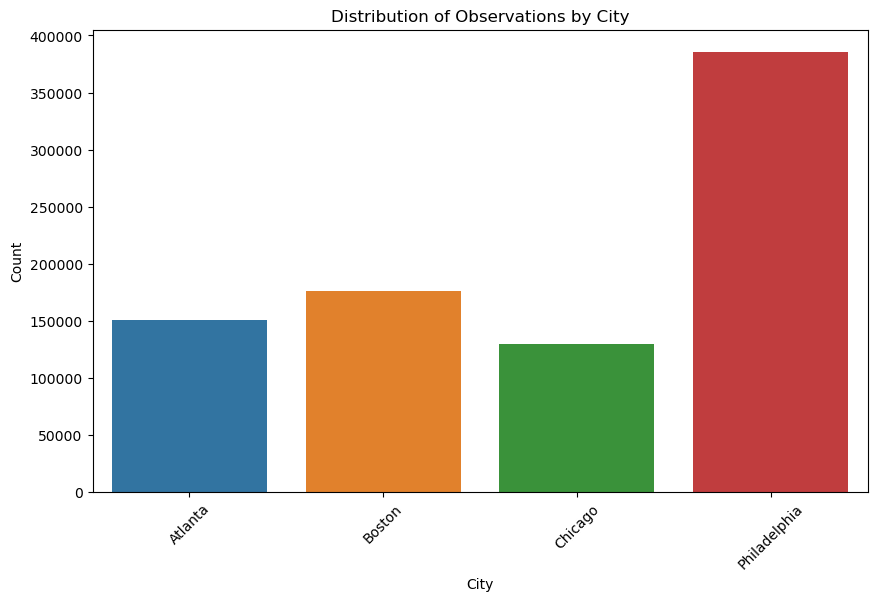

In [68]:
# Plot bar chart of 'City'
plt.figure(figsize=(10, 6))
sns.countplot(data=train_cleaned, x='City')
plt.title('Distribution of Observations by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

**2.4 Traffic Congestion by City**

In [70]:
# Averages per City based on 50 & 80 percentile 
train_cleaned.groupby('City').agg({'TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'})

,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
City,,,,,,
Atlanta,9.561990,15.007181,30.672577,28.661106,41.370694,105.777004
Boston,8.568312,13.193209,23.469332,25.920588,35.456078,62.896978
Chicago,7.088462,11.347119,24.580853,21.321645,30.943332,69.790891
Philadelphia,6.594667,11.773366,31.756791,19.508972,31.490082,90.069086


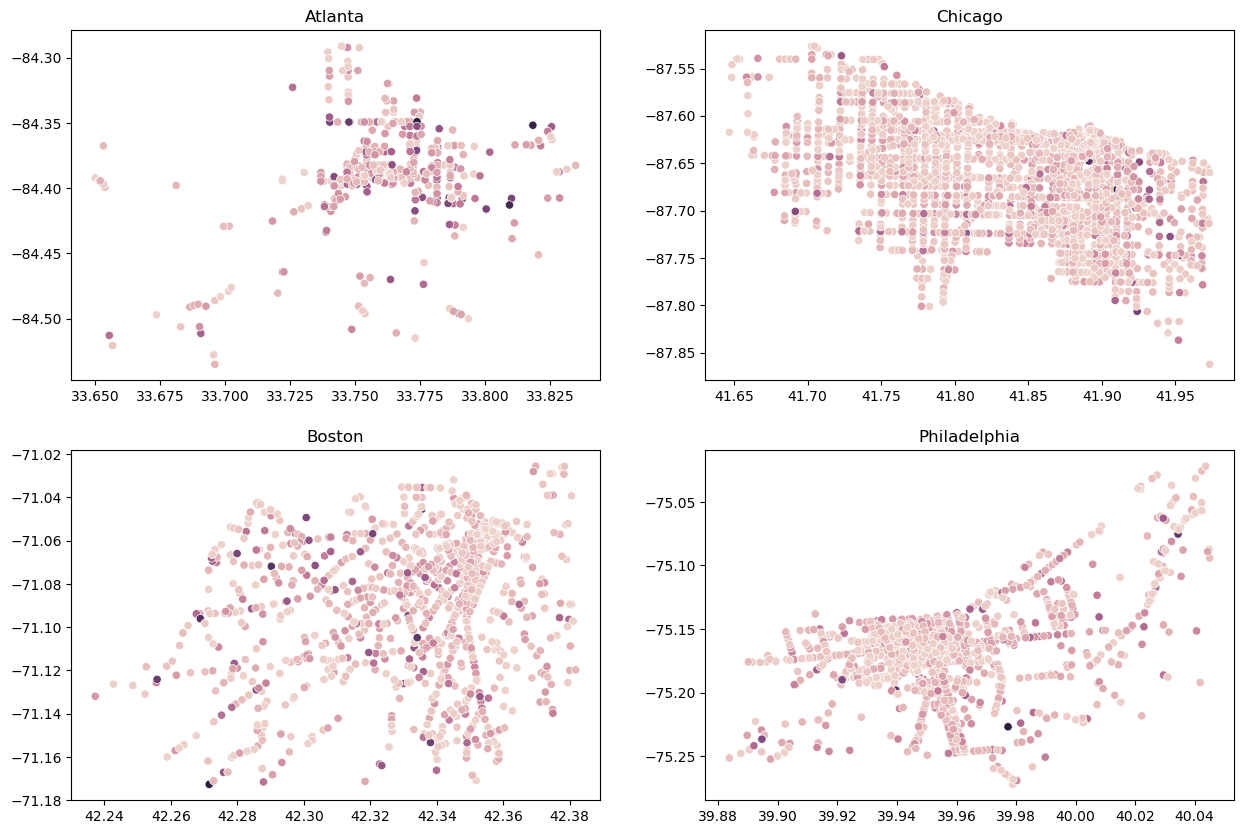

In [71]:
data = train_cleaned.groupby(['City','IntersectionId','Latitude','Longitude']).agg({'TotalTimeStopped_p50':'mean'}).reset_index()

fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i,city in enumerate(data['City'].unique().tolist()):   
    sns.scatterplot(x='Latitude',y='Longitude',data=data[data['City']==city],hue='TotalTimeStopped_p50',ax=axes[i%2,i//2],legend=False)
    axes[i%2,i//2].set_title(city)
    axes[i%2,i//2].set_xlabel('')
    axes[i%2,i//2].set_ylabel('')

Text(0.5, 0.98, 'Hourly Traffic on Weekdays')

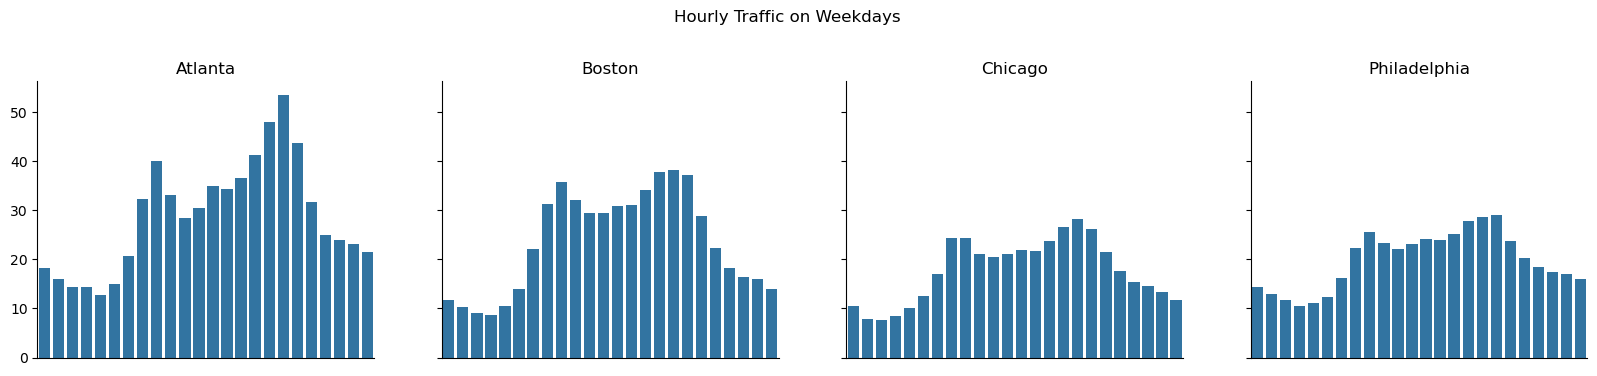

In [72]:
# Hourly Traffic per City on Weekdays using 80 percentile 
data = train_cleaned[train_cleaned['Weekend']==0].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='C0')
    axes[i].set_ylabel('')
    axes[i].set_title(city)
    axes[i].set_xlabel('')
    axes[i].get_xaxis().set_ticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekdays')

Text(0.5, 0.98, 'Hourly Traffic on Weekends')

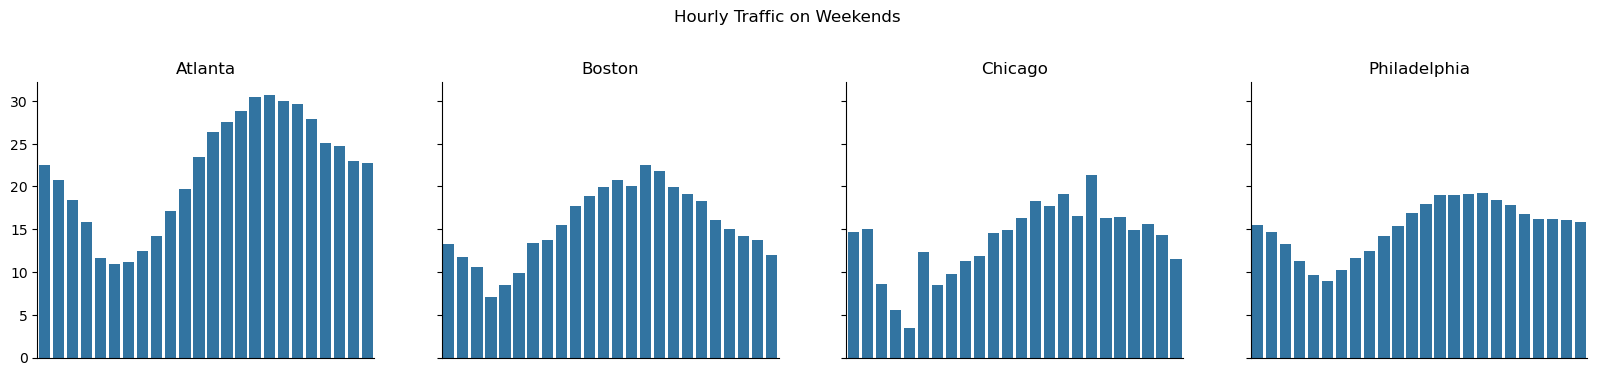

In [73]:
# Hourly Traffic per City on Weekends using 80 percentile 
data = train_cleaned[train_cleaned['Weekend']==1].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='C0')
    axes[i].set_ylabel('')
    axes[i].set_title(city)
    axes[i].set_xlabel('')
    axes[i].get_xaxis().set_ticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekends')

In [74]:
# Filter data for 'Atlanta'
atlanta_data = train_cleaned[train_cleaned['City'] == 'Atlanta']

# Select the waiting time columns
waiting_time_columns = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']

# Calculate the average waiting time across the selected columns
average_waiting_time_atlanta = atlanta_data[waiting_time_columns].mean().mean()

print("Average waiting time in Atlanta:", average_waiting_time_atlanta)

Average waiting time in Atlanta: 13.401771517913929


In [75]:
# Filter data for 'Atlanta'
atlanta_data = train_cleaned[train_cleaned['City'] == 'Atlanta']

# Select the distance columns
distance_columns = ['DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

# Calculate the average intersection distance across the selected columns
average_distance_atlanta = atlanta_data[distance_columns].mean().mean()

print("Average intersection distance in Atlanta:", average_distance_atlanta)

Average intersection distance in Atlanta: 47.609969260122966


COMMENTS: Atlanta city is more congested than the other cities with average waiting time of 13.40 seconds and average distance to intersecion 47.61 meters

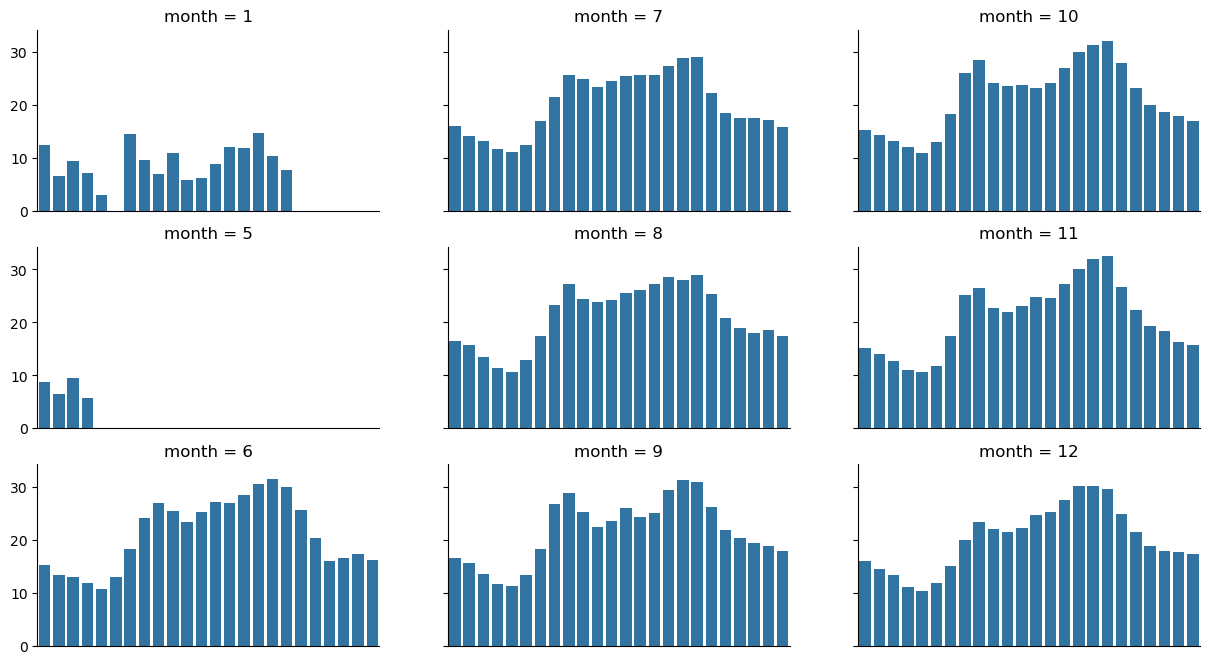

In [77]:
# Monthly Traffic per Hour using 80 percentile 
data = train_cleaned.groupby(['Month','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=data['Month'].nunique()//3, ncols=data['Month'].nunique()//3, figsize=(15,8), sharey=True,sharex=True)
for i,month in enumerate(sorted(data['Month'].unique())):
    sns.barplot(data=data[data['Month']==month] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i%3,i//3], color='C0')
    axes[i%3,i//3].set_title(f'month = {month}')
    axes[i%3,i//3].set_ylabel('')
    axes[i%3,i//3].set_xlabel('')
    axes[i%3,i//3].get_xaxis().set_ticks([])
    axes[i%3,i//3].spines['top'].set_visible(False)
    axes[i%3,i//3].spines['right'].set_visible(False)

In [78]:
# Group data by 'Month' and 'Hour' and calculate the mean of the 80th percentile column
average_hourly_p80 = train_cleaned.groupby(['Month', 'Hour'])['TotalTimeStopped_p80'].mean().reset_index()

# Pivot the table to get months as rows and hours as columns
average_hourly_p80_pivot = average_hourly_p80.pivot(index='Month', columns='Hour', values='TotalTimeStopped_p80')

print("Average 80th percentile waiting time per hour for each month:")
print(average_hourly_p80_pivot)

Average 80th percentile waiting time per hour for each month:
Hour          0          1          2          3          4          5   \
Month                                                                     
1      12.453488   6.543103   9.346939   7.146067   2.906250   0.000000   
5            NaN        NaN        NaN        NaN        NaN        NaN   
6      15.148961  13.307870  12.888587  11.900436  10.667838  12.949025   
7      16.008525  14.029663  13.210716  11.629951  11.105378  12.334620   
8      16.486516  15.651185  13.464912  11.341037  10.521784  12.904213   
9      16.545318  15.525891  13.476676  11.687648  11.269772  13.332665   
10     15.175253  14.388610  13.244375  12.056750  10.954483  12.975146   
11     15.103405  14.060220  12.623043  10.892823  10.594187  11.801143   
12     15.897649  14.520649  13.269087  10.989049  10.341809  11.751654   

Hour          6          7          8          9   ...         14         15  \
Month                           

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


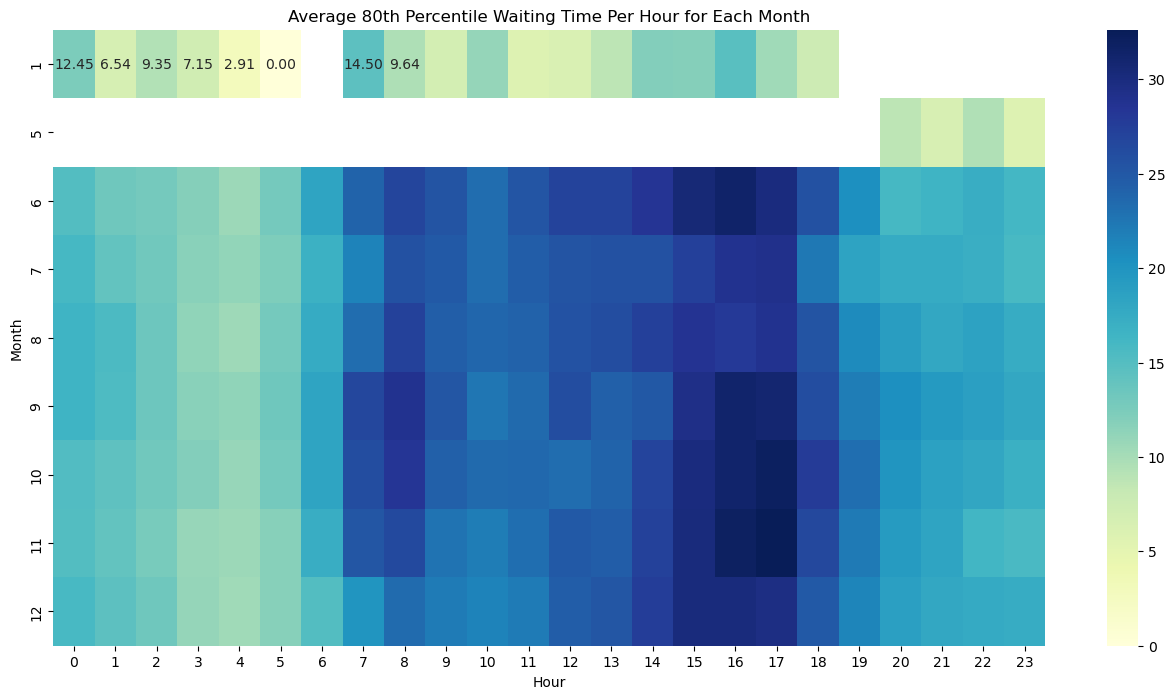

In [79]:
# Plot a heatmap to visualize the data
plt.figure(figsize=(16, 8))
sns.heatmap(average_hourly_p80_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average 80th Percentile Waiting Time Per Hour for Each Month")
plt.show()

COMMENTS: Fiew data are available for the month of Jan and May, on the otherhand, Feb, Mar, and Apr have no data.

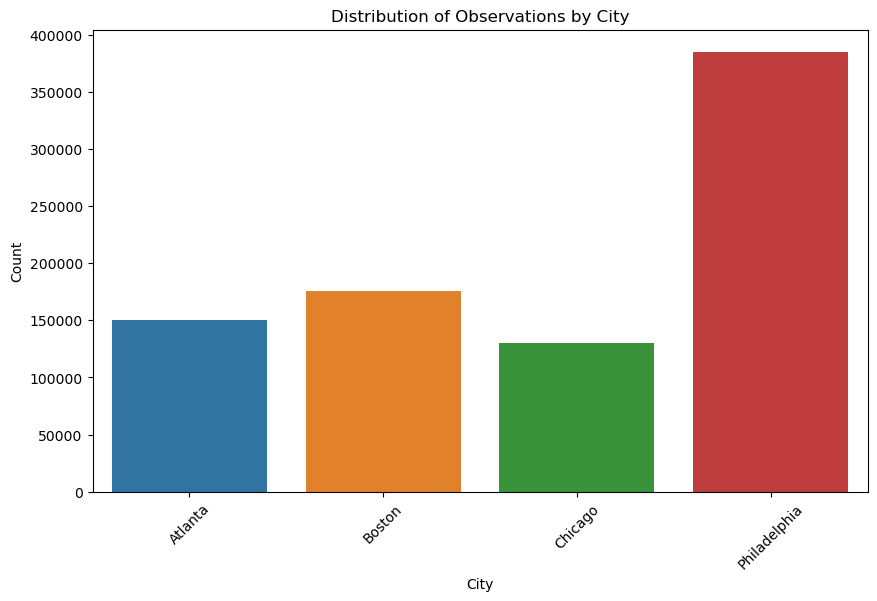

In [81]:
# Subset the train data for the months from June (6) to December (12)
subset_train = train_cleaned[train_cleaned['Month'].between(6, 12)]

# Plot bar chart of 'City'
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_train, x='City')
plt.title('Distribution of Observations by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [82]:
# Find numerical columns of subset_train
numerical_subset = subset_train.select_dtypes(include=['number'])

print("Numerical columns:", numerical_subset)

Numerical columns:         IntersectionId   Latitude  Longitude  Hour  Weekend  Month  \
0                    0  33.791659 -84.430032     0        0      6   
1                    0  33.791659 -84.430032     0        0      6   
2                    0  33.791659 -84.430032     1        0      6   
3                    0  33.791659 -84.430032     1        0      6   
4                    0  33.791659 -84.430032     2        0      6   
...                ...        ...        ...   ...      ...    ...   
856382            1990  39.938232 -75.149930    17        1     12   
856383            1990  39.938232 -75.149930    18        1     12   
856384            1990  39.938232 -75.149930    19        1     12   
856385            1990  39.938232 -75.149930    20        1     12   
856386            1990  39.938232 -75.149930    23        1     12   

        TotalTimeStopped_p20  TotalTimeStopped_p40  TotalTimeStopped_p50  \
0                        0.0                   0.0              

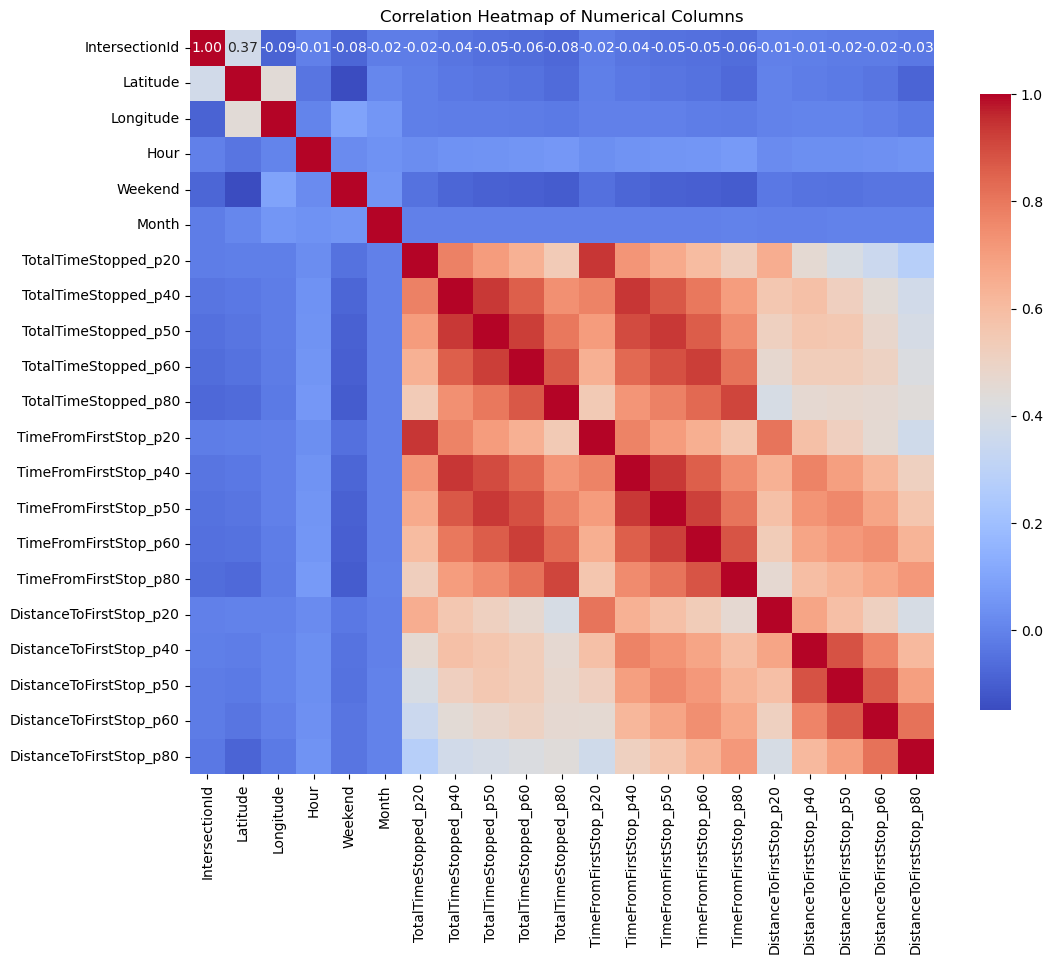

In [83]:
# Compute the correlation matrix of numerical columns
correlation_matrix = numerical_subset.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [84]:
# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_subset.corr()

# Set a threshold for high correlation
threshold = 0.7

# Find pairs of highly correlated columns
high_corr_pairs = []

# Iterate through the correlation matrix to find high correlation pairs
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if column != index:  # Avoid self-correlation
            if correlation_matrix.loc[index, column] > threshold:
                high_corr_pairs.append((index, column, correlation_matrix.loc[index, column]))

# Convert the list of high correlation pairs to a DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column 1', 'Column 2', 'Correlation Coefficient'])

# Sort the DataFrame by 'Correlation Coefficient' in descending order
high_corr_df = high_corr_df.sort_values(by='Correlation Coefficient', ascending=False)

print("Highly Positive Correlated Columns (sorted):")
print(high_corr_df)

Highly Positive Correlated Columns (sorted):
                 Column 1               Column 2  Correlation Coefficient
35   TotalTimeStopped_p20  TimeFromFirstStop_p20                 0.940230
2   TimeFromFirstStop_p20   TotalTimeStopped_p20                 0.940230
9   TimeFromFirstStop_p40   TotalTimeStopped_p40                 0.939062
42   TotalTimeStopped_p40  TimeFromFirstStop_p40                 0.939062
52   TotalTimeStopped_p50  TimeFromFirstStop_p50                 0.936325
..                    ...                    ...                      ...
39  TimeFromFirstStop_p50  TimeFromFirstStop_p20                 0.706227
1    TotalTimeStopped_p50   TotalTimeStopped_p20                 0.705597
12   TotalTimeStopped_p20   TotalTimeStopped_p50                 0.705597
37   TotalTimeStopped_p50  TimeFromFirstStop_p20                 0.705538
16  TimeFromFirstStop_p20   TotalTimeStopped_p50                 0.705538

[92 rows x 3 columns]


In [85]:
# Find categorical columns
categorical_subset = subset_train.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_subset)

Categorical columns: ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City']


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Atlanta'),
  Text(1, 0, 'Boston'),
  Text(2, 0, 'Chicago'),
  Text(3, 0, 'Philadelphia')])

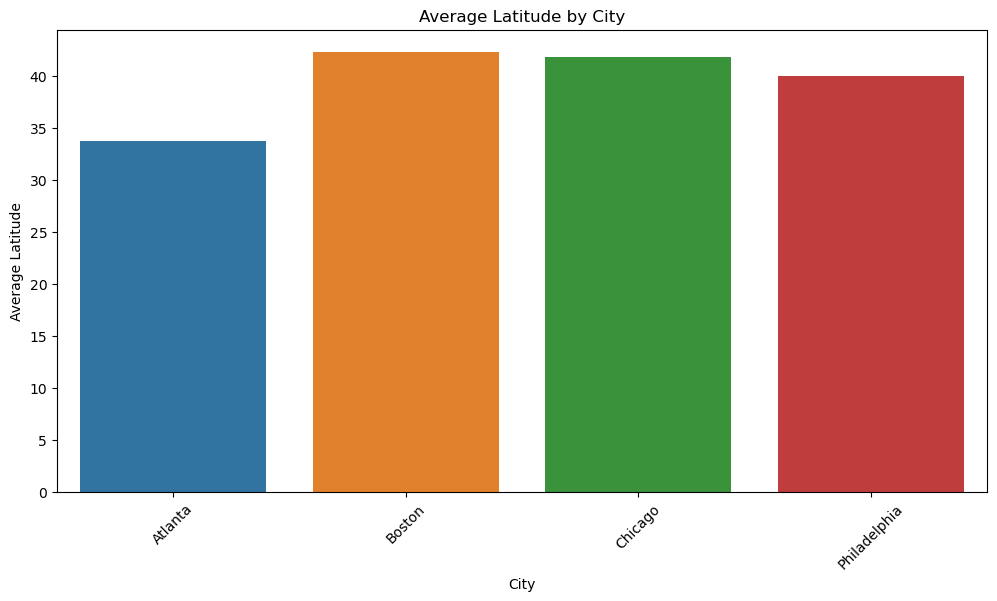

In [86]:
# Group by 'City' and calculate the mean latitude for each city
city_latitude_means = subset_train.groupby('City')['Latitude'].mean().reset_index()

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='City', y='Latitude', data=city_latitude_means)

# Add titles and labels
plt.title('Average Latitude by City')
plt.xlabel('City')
plt.ylabel('Average Latitude')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Step 3: Feature Encoding

Categorical features like 'EntryHeading,' 'ExitHeading,' 'City,' 'EntryStreetName,' and 'ExitStreetName' need to be encoded. We can use label encoding or one-hot encoding.

In [89]:
# Display the unique values in the relevant categorical columns
print("Unique values in EntryStreetName:")
print(train_cleaned['EntryStreetName'].unique())

print("Unique values in ExitStreetName:")
print(train_cleaned['ExitStreetName'].unique())

Unique values in EntryStreetName:
['Marietta Boulevard Northwest' 'Peachtree Street Southwest'
 'Mitchell Street Southwest' ... 'Spring Garden Tunnel' 'Lindley Avenue'
 'Rorer Street']
Unique values in ExitStreetName:
['Marietta Boulevard Northwest' 'Mitchell Street Southwest'
 'Peachtree Street Southwest' ... 'Overbrook Avenue' 'Lindley Avenue'
 'Rorer Street']


In [90]:
# Convert categorical columns to string
for col in ['EntryStreetName', 'ExitStreetName']:
    train_cleaned[col] = train_cleaned[col].astype(str)

# Clean the strings, removing any unwanted characters
train_cleaned['EntryStreetName'] = train_cleaned['EntryStreetName'].str.replace('_[A-Za-z]+', '', regex=True).str.strip()
train_cleaned['ExitStreetName'] = train_cleaned['ExitStreetName'].str.replace('_[A-Za-z]+', '', regex=True).str.strip()

# Check for NaN values and fill them with empty strings
train_cleaned['EntryStreetName'].fillna('', inplace=True)
train_cleaned['ExitStreetName'].fillna('', inplace=True)

# Check for NaN values again
print("NaN values in EntryStreetName:", train_cleaned['EntryStreetName'].isnull().sum())
print("NaN values in ExitStreetName:", train_cleaned['ExitStreetName'].isnull().sum())

# Check the unique values again to see if cleaning worked
print("Cleaned unique values in EntryStreetName:")
print(train_cleaned['EntryStreetName'].unique())

print("Cleaned unique values in ExitStreetName:")
print(train_cleaned['ExitStreetName'].unique())

NaN values in EntryStreetName: 0
NaN values in ExitStreetName: 0
Cleaned unique values in EntryStreetName:
['Marietta Boulevard Northwest' 'Peachtree Street Southwest'
 'Mitchell Street Southwest' ... 'Spring Garden Tunnel' 'Lindley Avenue'
 'Rorer Street']
Cleaned unique values in ExitStreetName:
['Marietta Boulevard Northwest' 'Mitchell Street Southwest'
 'Peachtree Street Southwest' ... 'Overbrook Avenue' 'Lindley Avenue'
 'Rorer Street']


In [91]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to street names
le = LabelEncoder()
train_cleaned['EntryStreetName'] = le.fit_transform(train_cleaned['EntryStreetName'])
train_cleaned['ExitStreetName'] = le.fit_transform(train_cleaned['ExitStreetName'])

# One-hot encode categorical columns
train_encoded = pd.get_dummies(train_cleaned, columns=['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'City'], drop_first=True)

# Check the shape of the new DataFrame
print(f'Encoded DataFrame shape: {train_encoded.shape}')

Encoded DataFrame shape: (842452, 3464)


# Step 4: Exploratory Data Analysis (EDA)

**4.1 Univariate Analysis**

Plot histograms or box plots for numerical variables like TotalTimeStopped, TimeFromFirstStop, and DistanceToFirstStop.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


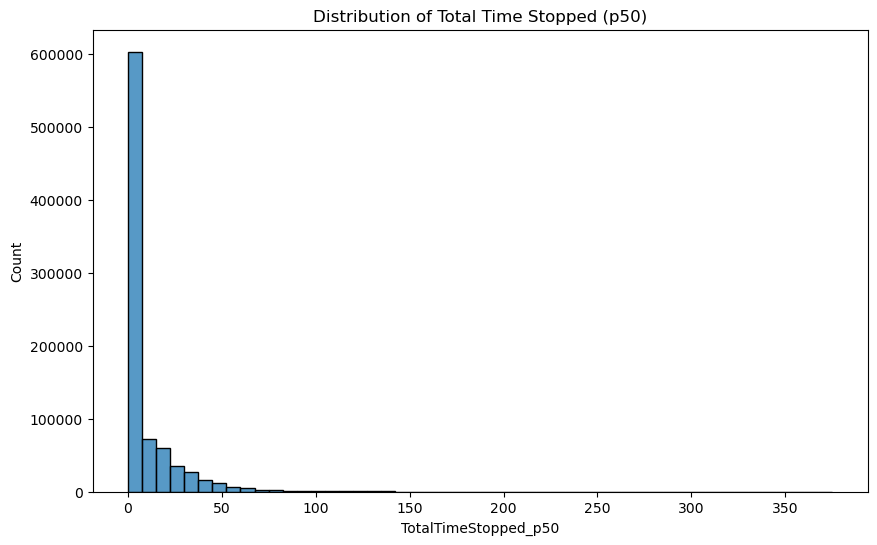

In [95]:
# Distribution of TotalTimeStopped
plt.figure(figsize=(10, 6))
sns.histplot(train_encoded['TotalTimeStopped_p50'], bins=50)
plt.title('Distribution of Total Time Stopped (p50)')
plt.show()

**4.2 Bivariate Analysis**

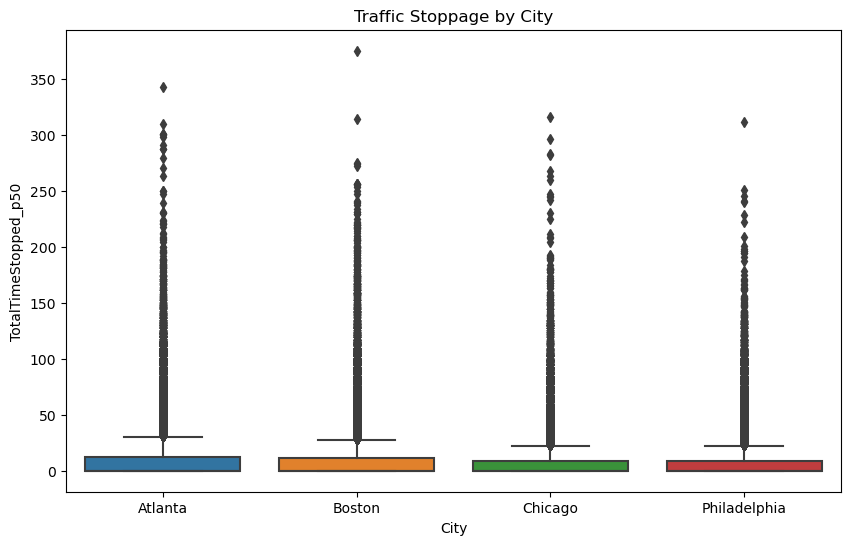

In [97]:
# Relationship between City and TotalTimeStopped
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='TotalTimeStopped_p50', data=train_cleaned)
plt.title('Traffic Stoppage by City')
plt.show()

# Step 5: Hypothesis Testing

We can test relationships using statistical methods such as t-tests or ANOVA. For example, we can check if the city has an effect on total stopped time.

**Check Group Sizes**

In [101]:
# Count the number of observations for each city
city_counts = train_cleaned['City'].value_counts()
print(city_counts)

City
Philadelphia    385754
Boston          175856
Atlanta         150944
Chicago         129898
Name: count, dtype: int64


**Filter Out Empty Groups**

In [103]:
from scipy import stats

# Set a threshold for minimum observations per group
min_count = 10  # Adjust based on your preference
valid_cities = city_counts[city_counts >= min_count].index

# Filter the dataset to include only valid cities
train_filtered = train_cleaned[train_cleaned['City'].isin(valid_cities)]

# Check the shape of the filtered dataset
print(train_filtered.shape)

# Perform ANOVA test again if there are valid groups
if len(valid_cities) > 1:
    anova_result = stats.f_oneway(
        *(train_filtered[train_filtered['City'] == city]['TotalTimeStopped_p50'] for city in valid_cities)
    )
    print(f'ANOVA result: {anova_result}')
else:
    print("Not enough valid groups for ANOVA.")

(842452, 28)
ANOVA result: F_onewayResult(statistic=1630.5273643183332, pvalue=0.0)


In [104]:
# Sample a few rows of the DataFrame to identify the problematic entry
print(train_encoded.sample(10))

        IntersectionId   Latitude  Longitude  Hour  Weekend  Month  \
625216             798  39.939638 -75.198121    20        0     10   
134700             438  33.827572 -84.387454    10        0      7   
841014            1913  39.987731 -75.216204    14        0     11   
635439             841  39.967225 -75.168565    15        1      6   
79685              248  33.773814 -84.359957    16        0     11   
735448            1371  40.024563 -75.123220     0        0      8   
492263             114  39.899131 -75.174831    21        0      6   
771209            1541  40.002274 -75.220191    13        1     12   
277037             807  42.326119 -71.075366    13        0     12   
19399               53  33.764658 -84.390351    15        0     11   

                                                     Path  \
625216            South 34th Street_S_South 34th Street_S   
134700                  Peachtree Road_S_Peachtree Road_S   
841014               Belmont Avenue_N_Wynnefie

# Step 6: Model Building

We'll now move into the model building phase. Let's start by splitting the data into features and the target variable. For example, if you're predicting 'TotalTimeStopped_p50':

**6.1 Supervised Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target (y)
X = train_encoded.drop(columns=['TotalTimeStopped_p50'])
y = train_encoded['TotalTimeStopped_p50']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

**6.2 Time Series Model**

In [ ]:
# Aggregating by hour for time series analysis
train_time_series = train_cleaned.groupby(['City', 'Hour']).agg({
    'TotalTimeStopped_p50': 'mean'
}).reset_index()

# Step 7: Model Evaluation

Compare models using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R².

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, R²: {r2}')

**Conclusion:**

MAE, treats all deviations from the true values equally. It is intuitively easier to understand since it’s simply the average error in the same units as the data. 

R-Squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. R-Squared shows how well your predictions approximate the real data points. It’s like grading a test out of 100%. A high R-Squared (close to 1) means the model is very closely predict the actual values. A high R-Squared would indicate that the model captures most of the variability in total time stopped.